<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/UARIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
plt.style.use('fivethirtyeight')

In [249]:
data = pd.read_json('https://www.datos.gov.co/resource/tr34-nyqp.json')
data.head()

,no,nombre_o_titulo_de_la,idioma,medio_de_conservaci_n_y_o,formato,lugar_de_consulta,fecha_de_generaci_n_de_la,frecuencia_de_actualizaci,responsable_de_la_producci,responsable_de_la_informaci
0,1,Servidor,N/A,Electrónico,Otro,\\IPprivada,2018,Según requerimiento,Gestión de la información/Oficina de Tecnologí...,Infraestructura tecnológica
1,2,Servidor,N/A,Electrónico,Otro,\\IPprivada,2018,Según requerimiento,Gestión de la información/Oficina de Tecnologí...,Infraestructura tecnológica
2,3,Servidor,N/A,Electrónico,Otro,\\IPprivada,2018,Según requerimiento,Gestión de la información/Oficina de Tecnologí...,Infraestructura tecnológica
3,4,Servidor,N/A,Electrónico,Otro,\\IPprivada,2018,Según requerimiento,Gestión de la información/Oficina de Tecnologí...,Infraestructura tecnológica
4,5,Servidor,N/A,Electrónico,Otro,\\IPprivada,2018,Según requerimiento,Gestión de la información/Oficina de Tecnologí...,Infraestructura tecnológica


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   no                           1000 non-null   int64 
 1   nombre_o_titulo_de_la        1000 non-null   object
 2   idioma                       1000 non-null   object
 3   medio_de_conservaci_n_y_o    1000 non-null   object
 4   formato                      1000 non-null   object
 5   lugar_de_consulta            1000 non-null   object
 6   fecha_de_generaci_n_de_la    1000 non-null   object
 7   frecuencia_de_actualizaci    1000 non-null   object
 8   responsable_de_la_producci   1000 non-null   object
 9   responsable_de_la_informaci  1000 non-null   object
dtypes: int64(1), object(9)
memory usage: 78.2+ KB


In [251]:
data.isnull().sum()

no                             0
nombre_o_titulo_de_la          0
idioma                         0
medio_de_conservaci_n_y_o      0
formato                        0
lugar_de_consulta              0
fecha_de_generaci_n_de_la      0
frecuencia_de_actualizaci      0
responsable_de_la_producci     0
responsable_de_la_informaci    0
dtype: int64

In [252]:
data['medio_de_conservaci_n_y_o'].unique()

array(['Electrónico', 'Físico', 'Físico/Electrónico', 'N/A',
       'Fisico/Electrónico'], dtype=object)

In [253]:
data['idioma'] = data['idioma'].map({'español':'Español', 'Español':'Español', 'N/A':'N/A'})
data['medio_de_conservaci_n_y_o'] = data['medio_de_conservaci_n_y_o'].map({'Electrónico':'Electrónico','Físico':'Físico','Físico/Electrónico':'Fisico/Electrónico',
                                                                           'N/A':'N/A','Fisico/Electrónico':'Fisico/Electrónico'})

In [254]:
pivot = pd.pivot_table(data,values = 'no', index = 'fecha_de_generaci_n_de_la', aggfunc='count')
pivot

,no
fecha_de_generaci_n_de_la,
1905-07-13T00:00:00.000,2
2009-05-05T00:00:00.000,1
2009-12-31T00:00:00.000,3
2010-06-02T00:00:00.000,1
2011,1
...,...
2022-05-25T00:00:00.000,1
2022-06-01T00:00:00.000,1
2022-06-07T00:00:00.000,2


In [255]:
data['fecha_de_generaci_n_de_la'] = pd.to_datetime(data['fecha_de_generaci_n_de_la'], format = '%Y',errors='coerce')

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   no                           1000 non-null   int64         
 1   nombre_o_titulo_de_la        1000 non-null   object        
 2   idioma                       1000 non-null   object        
 3   medio_de_conservaci_n_y_o    1000 non-null   object        
 4   formato                      1000 non-null   object        
 5   lugar_de_consulta            1000 non-null   object        
 6   fecha_de_generaci_n_de_la    364 non-null    datetime64[ns]
 7   frecuencia_de_actualizaci    1000 non-null   object        
 8   responsable_de_la_producci   1000 non-null   object        
 9   responsable_de_la_informaci  1000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 78.2+ KB


In [257]:
data['año'] = pd.DatetimeIndex(data['fecha_de_generaci_n_de_la']).year

In [258]:
data['año'] = data['año'].fillna(0)

In [259]:
data['año'].isnull().sum()

0

In [260]:
data['año'] = data['año'].astype('int')

In [261]:
pd.pivot_table(data,values='no', index='año', aggfunc='count')

,no
año,
0,636
2011,1
2012,26
2013,3
2014,1
2015,47
2016,11
2017,7
2018,135


In [262]:
medio = data.groupby('medio_de_conservaci_n_y_o')['no'].count().sort_values(ascending=False)

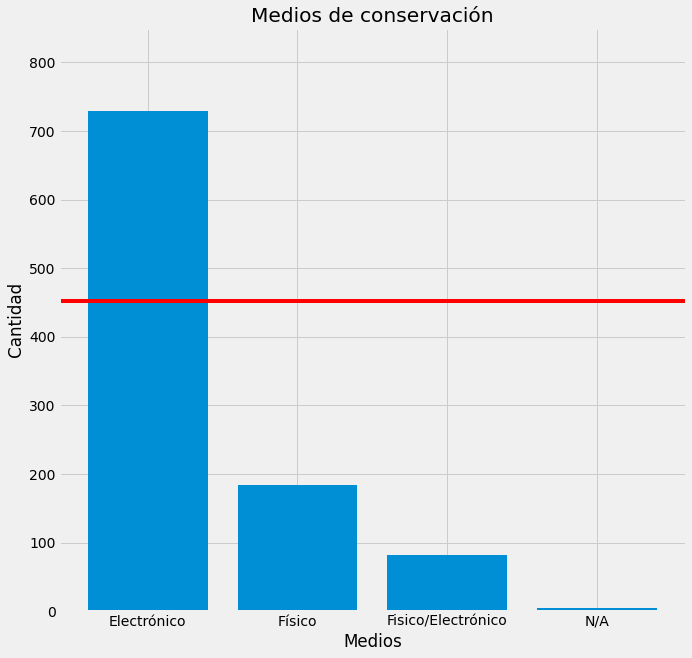

In [300]:
plt.figure(figsize=(10,10))
plt.bar(x = medio.index, height = medio.values, )
plt.title('Medios de conservación')
plt.xlabel('Medios')
plt.ylabel('Cantidad')
plt.ylim(top=850)
plt.axhline(y = data['no'].median(), color='r')
plt.show()

In [264]:
px.bar(data,x='medio_de_conservaci_n_y_o', y='no', color='idioma',)

In [265]:
px.sunburst(data,path =['medio_de_conservaci_n_y_o','formato'], values='no',title='Formatos de entrega')

In [266]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [267]:
año = data.groupby('año')['no'].count().sort_values(ascending=True).nlargest(9)
año

año
0       636
2018    135
2019     67
2015     47
2021     42
2012     26
2020     12
2022     12
2016     11
Name: no, dtype: int64

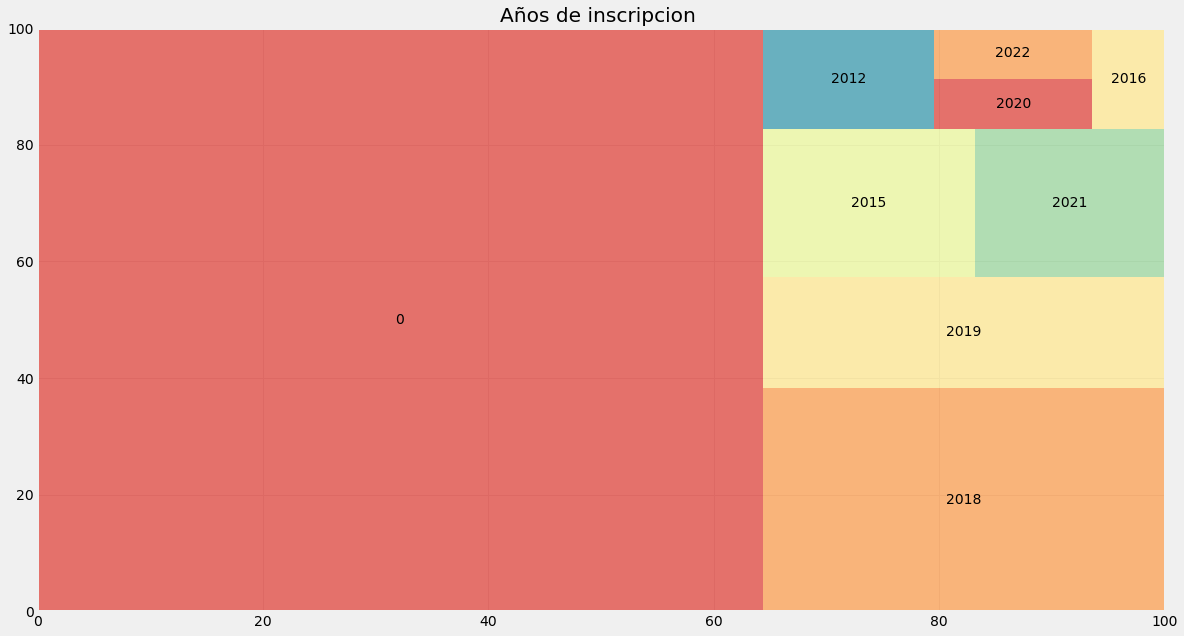

In [289]:
import squarify

sizes=año.values 
label=año.index 

plt.figure(figsize=(18,10))
squarify.plot(sizes=sizes, label=label, color=sns.color_palette('Spectral'), alpha=0.8)
plt.title('Años de inscripcion ')
plt.show()


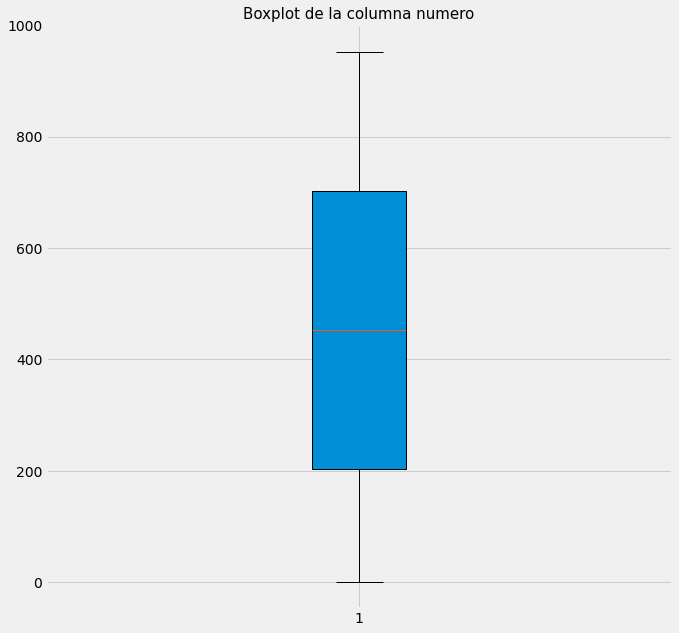

In [299]:
plt.figure(figsize=(10,10))
plt.boxplot(data['no'], patch_artist=True)
plt.title('Boxplot de la columna numero', fontsize=15)
plt.ylim(top=1000)
plt.show()

In [313]:
frecuencia = data.groupby('frecuencia_de_actualizaci')['no'].count().sort_values(ascending=False).nlargest(9)
frecuencia

frecuencia_de_actualizaci
Según requerimiento    528
Diaria                 144
N/A                     99
Mensual                 92
Anual                   43
según requerimiento     30
Según Requerimiento     23
Semanal                 20
Trimestral               9
Name: no, dtype: int64

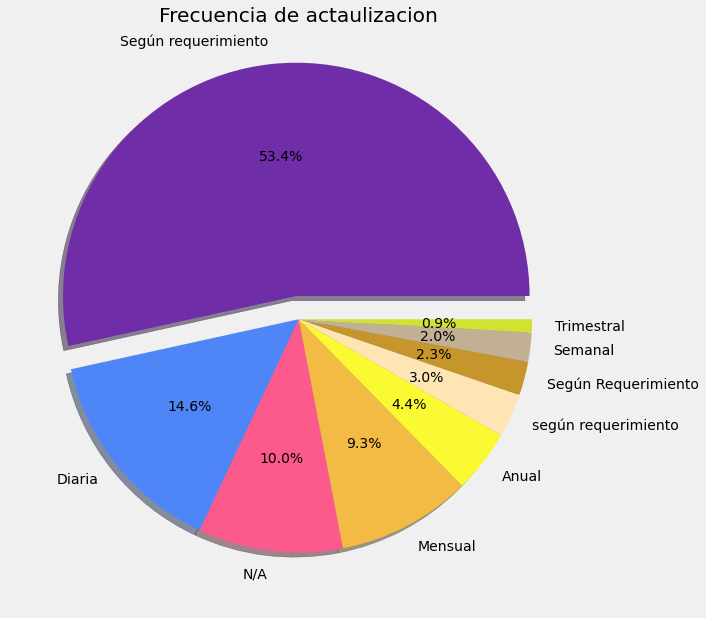

In [317]:
colors = ['#6f2da8','#4f86f7', '#fc5a8d', '#F4BB44','#FAFA33', '#ffe5b4', '#c6952b','#c1b094', '#d1e231' ]
explode = [0.1,0,0,0,0,0,0,0,0]
plt.figure(figsize=(10,10))
plt.pie(x = frecuencia.values, labels=frecuencia.index, autopct='%1.1f%%', colors=colors,shadow=True, explode = explode )
plt.title('Frecuencia de actaulizacion')
plt.show()